### Formulas used for sales forecasting



### Intialization of required libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import math
import collections
import csv

from matplotlib import pyplot as plt
from matplotlib import ticker as tckr
from scipy import stats
from tensorflow.python.platform import gfile


import shutil

print("TensorFlow v" + tf.__version__)
print("Numpy v" + np.__version__)
print("Pandas v" + pd.__version__)

# Setup global style for seaborn
sns.set(style="ticks", color_codes=True)
sns.set_style("darkgrid")

TensorFlow v1.10.1
Numpy v1.14.5
Pandas v0.23.4


### Reading of dataset from csv file as dataframe

In [2]:
df_annual_sales = pd.read_csv('./csv/annual_sales.csv')
df_monthly_sales = pd.read_csv('./csv/monthly_sales.csv')

### Plotting of annual sales

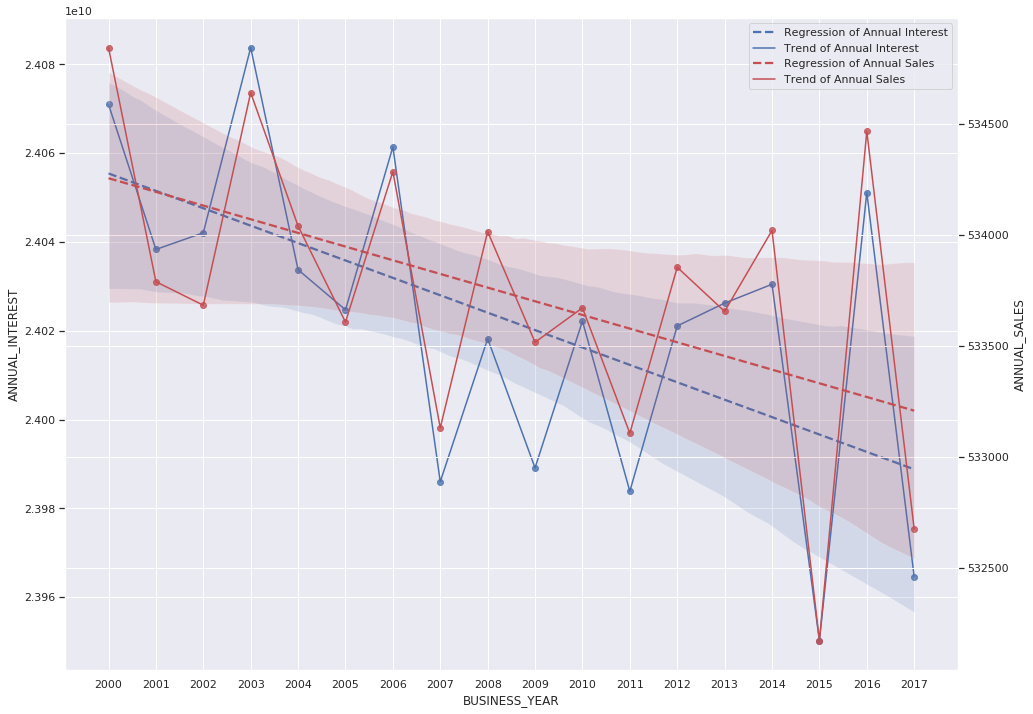

In [3]:
# Declare base figure plot
fig, ax = plt.subplots(figsize=(16, 12))

# Draw regression line for annual interest
ai_reg = sns.regplot(x='BUSINESS_YEAR', y='ANNUAL_INTEREST', label="Annual Interest", data=df_annual_sales, ax=ax, truncate=True, color='b')
ai_reg.xaxis.set_major_locator(tckr.MultipleLocator(1))

# Draw line plot to trace scattered points from regression plot
ai_line = sns.lineplot(x='BUSINESS_YEAR', y='ANNUAL_INTEREST', legend=None, data=df_annual_sales, ax=ax, color='b')

# Make secondary axis to overlap plotting for annual sales
ax2 = ax.twinx()

# Draw regression line for annual sales
as_reg = sns.regplot(x='BUSINESS_YEAR', y='ANNUAL_SALES', label="Annual Sales", data=df_annual_sales, ax=ax2, truncate=True, color='r')
as_reg.xaxis.set_major_locator(tckr.MultipleLocator(1))

# Draw line plot to trace scattered points from regression plot
as_line = sns.lineplot(x='BUSINESS_YEAR', y='ANNUAL_SALES', legend=None, data=df_annual_sales, ax=ax2, color='r')

# Make regression line from base axis and secondary axis dashed lines
ax.lines[0].set_linestyle("--")
ax2.lines[0].set_linestyle("--")

# Compile legends from axes and display it on base axis
hndl_ax = ax.get_lines()
hndl_ax2 = ax2.get_lines()
lg_ax = ["Regression of Annual Interest", "Trend of Annual Interest"]
lg_ax2 = ["Regression of Annual Sales", "Trend of Annual Sales"]
ax.legend(hndl_ax+hndl_ax2, lg_ax+lg_ax2)

### Plotting of monthly sales

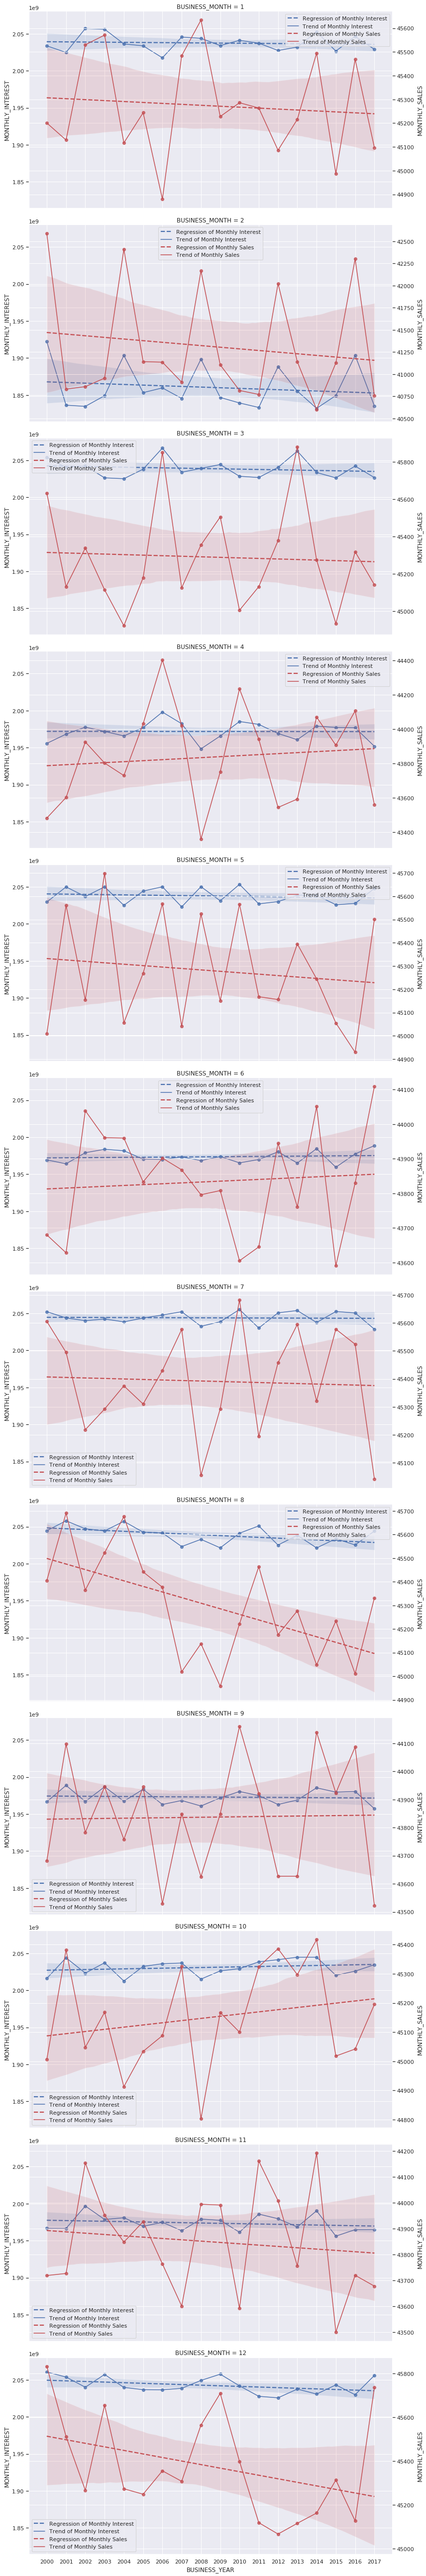

In [4]:
# Define function to plot monthly sales and interest
def monthly_plot(xr, yr, y2r, **kwargs):
    # Get current active base figure and axis to plot on
    ax = mfg.fig.gca()

    # Draw regression line for monthly interest
    mi_reg = sns.regplot(x=xr, y=yr, label="Monthly Interest", data=df_monthly_sales, ax=ax, truncate=True, color='b')
    mi_reg.xaxis.set_major_locator(tckr.MultipleLocator(1))

    # Draw line plot to trace scattered points from regression plot
    mi_line = sns.lineplot(x=xr, y=yr, legend=None, data=df_monthly_sales, ax=ax, color='b')
    
    # Make secondary axis to overlap plotting for monthly sales
    ax2 = ax.twinx()

    # Draw regression line for monthly sales
    ms_reg = sns.regplot(x=xr, y=y2r, label="Monthly Sales", data=df_monthly_sales, ax=ax2, truncate=True, color='r')
    ms_reg.xaxis.set_major_locator(tckr.MultipleLocator(1))

    # Draw line plot to trace scattered points from regression plot
    as_line = sns.lineplot(x=xr, y=y2r, legend=None, data=df_monthly_sales, ax=ax2, color='r')
    as_line.set(ylabel = "MONTHLY_SALES")

    # Make regression line from base axis and secondary axis dashed lines
    ax.lines[0].set_linestyle("--")
    ax2.lines[0].set_linestyle("--")

    # Compile legends from axes and display it on base axis
    hndl_ax = ax.get_lines()
    hndl_ax2 = ax2.get_lines()
    lg_ax = ["Regression of Monthly Interest", "Trend of Monthly Interest"]
    lg_ax2 = ["Regression of Monthly Sales", "Trend of Monthly Sales"]
    mfg.fig.gca().legend(hndl_ax+hndl_ax2, lg_ax+lg_ax2)
    
# Declare facet grid for multiple plotting using business month column
mfg = sns.FacetGrid(df_monthly_sales, col="BUSINESS_MONTH", col_wrap=1, height=6, aspect=2)

# Map per month plotting on facet grid
mfg = mfg.map(monthly_plot, "BUSINESS_YEAR", "MONTHLY_INTEREST", "MONTHLY_SALES")

### Summary of annual and monthly sales dataframe

In [5]:
# Viewing head and summary of annual sales dataframe
print(df_annual_sales.head())
df_annual_sales.describe()

   BUSINESS_YEAR  ANNUAL_SALES  ANNUAL_INTEREST
0           2000        534844     2.407096e+10
1           2001        533789     2.403830e+10
2           2002        533683     2.404206e+10
3           2003        534641     2.408375e+10
4           2004        534040     2.403373e+10


,BUSINESS_YEAR,ANNUAL_SALES,ANNUAL_INTEREST
count,18.000000,18.000000,1.800000e+01
mean,2008.500000,533731.555556,2.402210e+10
std,5.338539,667.285213,3.581978e+07
min,2000.000000,532171.000000,2.395020e+10
25%,2004.250000,533538.750000,2.399639e+10
50%,2008.500000,533736.000000,2.402546e+10
75%,2012.750000,534035.000000,2.404112e+10
max,2017.000000,534844.000000,2.408375e+10


In [6]:
# Viewing head and summary of monthly sales dataframe
print(df_monthly_sales.head())
df_monthly_sales.describe()

   BUSINESS_YEAR  BUSINESS_MONTH  MONTHLY_SALES  MONTHLY_INTEREST
0           2000               1          45201      2.033594e+09
1           2000               2          42589      1.922210e+09
2           2000               3          45633      2.054127e+09
3           2000               4          43482      1.955661e+09
4           2000               5          45008      2.029497e+09


,BUSINESS_YEAR,BUSINESS_MONTH,MONTHLY_SALES,MONTHLY_INTEREST
count,216.000000,216.000000,216.000000,2.160000e+02
mean,2008.500000,6.500000,44477.629630,2.001842e+09
std,5.200179,3.460071,1202.142681,5.402588e+07
min,2000.000000,1.000000,40603.000000,1.832107e+09
25%,2004.000000,3.750000,43844.250000,1.971861e+09
50%,2008.500000,6.500000,45045.000000,2.026027e+09
75%,2013.000000,9.250000,45315.250000,2.040257e+09
max,2017.000000,12.000000,45881.000000,2.066501e+09


### Combining annual and monthly dataframe

In [7]:
df_sales = pd.merge(df_annual_sales, df_monthly_sales, on=['BUSINESS_YEAR', 'BUSINESS_YEAR'])

print(df_sales.head())
df_sales.describe()

   BUSINESS_YEAR  ANNUAL_SALES  ANNUAL_INTEREST  BUSINESS_MONTH  \
0           2000        534844     2.407096e+10               1   
1           2000        534844     2.407096e+10               2   
2           2000        534844     2.407096e+10               3   
3           2000        534844     2.407096e+10               4   
4           2000        534844     2.407096e+10               5   

   MONTHLY_SALES  MONTHLY_INTEREST  
0          45201      2.033594e+09  
1          42589      1.922210e+09  
2          45633      2.054127e+09  
3          43482      1.955661e+09  
4          45008      2.029497e+09  


,BUSINESS_YEAR,ANNUAL_SALES,ANNUAL_INTEREST,BUSINESS_MONTH,MONTHLY_SALES,MONTHLY_INTEREST
count,216.000000,216.000000,2.160000e+02,216.000000,216.000000,2.160000e+02
mean,2008.500000,533731.555556,2.402210e+10,6.500000,44477.629630,2.001842e+09
std,5.200179,649.991017,3.489143e+07,3.460071,1202.142681,5.402588e+07
min,2000.000000,532171.000000,2.395020e+10,1.000000,40603.000000,1.832107e+09
25%,2004.000000,533516.000000,2.398912e+10,3.750000,43844.250000,1.971861e+09
50%,2008.500000,533736.000000,2.402546e+10,6.500000,45045.000000,2.026027e+09
75%,2013.000000,534040.000000,2.404206e+10,9.250000,45315.250000,2.040257e+09
max,2017.000000,534844.000000,2.408375e+10,12.000000,45881.000000,2.066501e+09


### Feature engineering for sales analysis

In [8]:
def add_more_features(df):
    new_df = pd.DataFrame()
    new_df['ANNUAL_SALES'] = df['ANNUAL_SALES'].astype('int64') 
    new_df['ANNUAL_INTEREST'] = df['ANNUAL_INTEREST'].astype('int64') 
    new_df['BUSINESS_YEAR'] = df['BUSINESS_YEAR'].astype('int64') 
    new_df['BUSINESS_MONTH'] = df['BUSINESS_MONTH'].astype('int64') 
    new_df['MONTHLY_SALES'] = df['MONTHLY_SALES'].astype('int64') 
    new_df['MONTHLY_SALES_MEAN'] = (df['MONTHLY_SALES'] / df['ANNUAL_SALES']).astype('int64') 
    new_df['MONTHLY_INTEREST'] = df['MONTHLY_INTEREST'].astype('int64') 
    new_df['MONTHLY_INTEREST_MEAN'] = (df['MONTHLY_INTEREST'] / df['ANNUAL_INTEREST']).astype('int64') 
    
    # Add more feature if needed
    return new_df

df_sales = add_more_features(df_sales)
print(df_sales.head())
df_sales.describe()

   ANNUAL_SALES  ANNUAL_INTEREST  BUSINESS_YEAR  BUSINESS_MONTH  \
0        534844      24070960236           2000               1   
1        534844      24070960236           2000               2   
2        534844      24070960236           2000               3   
3        534844      24070960236           2000               4   
4        534844      24070960236           2000               5   

   MONTHLY_SALES  MONTHLY_SALES_MEAN  MONTHLY_INTEREST  MONTHLY_INTEREST_MEAN  
0          45201                   0        2033593732                      0  
1          42589                   0        1922209515                      0  
2          45633                   0        2054127352                      0  
3          43482                   0        1955660649                      0  
4          45008                   0        2029496539                      0  


,ANNUAL_SALES,ANNUAL_INTEREST,BUSINESS_YEAR,BUSINESS_MONTH,MONTHLY_SALES,MONTHLY_SALES_MEAN,MONTHLY_INTEREST,MONTHLY_INTEREST_MEAN
count,216.000000,2.160000e+02,216.000000,216.000000,216.000000,216.0,2.160000e+02,216.0
mean,533731.555556,2.402210e+10,2008.500000,6.500000,44477.629630,0.0,2.001842e+09,0.0
std,649.991017,3.489143e+07,5.200179,3.460071,1202.142681,0.0,5.402588e+07,0.0
min,532171.000000,2.395020e+10,2000.000000,1.000000,40603.000000,0.0,1.832107e+09,0.0
25%,533516.000000,2.398912e+10,2004.000000,3.750000,43844.250000,0.0,1.971861e+09,0.0
50%,533736.000000,2.402546e+10,2008.500000,6.500000,45045.000000,0.0,2.026027e+09,0.0
75%,534040.000000,2.404206e+10,2013.000000,9.250000,45315.250000,0.0,2.040257e+09,0.0
max,534844.000000,2.408375e+10,2017.000000,12.000000,45881.000000,0.0,2.066501e+09,0.0


In [9]:
# Export new dataframe to csv
df_sales.to_csv('./csv/df_sales.csv', index=False)#, header=False)

### Model engineering for sales analysis

In [12]:

feature_columns = [
    tf.contrib.layers.real_valued_column("", dimension=3),
    tf.contrib.layers.real_valued_column("", dimension=4),
    tf.contrib.layers.real_valued_column("", dimension=5),
    tf.contrib.layers.real_valued_column("", dimension=6),
    tf.contrib.layers.real_valued_column("", dimension=7),
    tf.contrib.layers.real_valued_column("", dimension=8)
]

head = tf.contrib.learn.multi_head([
    tf.contrib.learn.multi_class_head(8, label_name="ANNUAL_SALES", head_name="ANNUAL_SALES"),
    tf.contrib.learn.multi_class_head(8, label_name="ANNUAL_INTEREST", head_name="ANNUAL_INTEREST"),
])


classifier = tf.contrib.learn.DNNEstimator(
    feature_columns=feature_columns,
    hidden_units=[10, 20, 10],
    head=head,
    model_dir='./tf'
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff37888ba58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './tf'}


In [13]:
Dataset = collections.namedtuple('Dataset', ['data', 'target'])

def load_csv_without_header(filename, target_dtype, features_dtype, target_columns):
    with gfile.Open(filename) as csv_file:
        csv_file.next()
        data_file = csv.reader(csv_file)
        data = []
        targets = {
            target_cols: []
            for target_cols in target_columns.keys()
        }
        for row in data_file:
            cols = sorted(target_columns.items(), key=lambda tup: tup[1], reverse=True)
            for target_col_name, target_col_i in cols:
                targets[target_col_name].append(row.pop(target_col_i))
            data.append(np.asarray(row, dtype=features_dtype))

        targets = {
            target_col_name: np.array(val, dtype=target_dtype[target_col_name])
            for target_col_name, val in targets.items()
        }
        data = np.array(data)
        return Dataset(data=data, target=targets)

def get_input_fn(filename):
    def input_fn():
        dataset = load_csv_without_header(
            filename=filename,
            target_dtype={
                "ANNUAL_SALES": np.int64,
                "ANNUAL_INTEREST": np.int64
            },
            features_dtype=np.float64,
            target_columns= {"ANNUAL_SALES": 0, "ANNUAL_INTEREST": 1}
        )
        x = tf.constant(dataset.data)
        y = {k: tf.constant(v) for k, v in dataset.target.items()}
        return x, y
    return input_fn

source = "./csv/df_sales.csv"

classifier.fit(input_fn=get_input_fn(source), steps=4000)
res = classifier.evaluate(input_fn=get_input_fn(source), steps=1)

print("Validation:", res)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./tf/model.ckpt-0


InvalidArgumentError: Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

tensor_name = dnn/logits/biases; shape in shape_and_slice spec [16] does not match the shape stored in checkpoint: [8]
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_INT64], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op 'save/RestoreV2', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-b448859e15f6>", line 43, in <module>
    classifier.fit(input_fn=get_input_fn(source), steps=4000)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 524, in fit
    loss = self._train_model(input_fn=input_fn, hooks=hooks)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 1091, in _train_model
    config=self._session_config) as mon_sess:
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/monitored_session.py", line 421, in MonitoredTrainingSession
    stop_grace_period_secs=stop_grace_period_secs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/monitored_session.py", line 832, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/monitored_session.py", line 555, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/monitored_session.py", line 1018, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/monitored_session.py", line 1023, in _create_session
    return self._sess_creator.create_session()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/monitored_session.py", line 712, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/monitored_session.py", line 474, in create_session
    self._scaffold.finalize()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/monitored_session.py", line 214, in finalize
    self._saver.build()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py", line 1293, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py", line 1330, in _build
    build_save=build_save, build_restore=build_restore)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py", line 772, in _build_internal
    restore_sequentially, reshape)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py", line 450, in _AddShardedRestoreOps
    name="restore_shard"))
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py", line 397, in _AddRestoreOps
    restore_sequentially)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py", line 829, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_io_ops.py", line 1463, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

tensor_name = dnn/logits/biases; shape in shape_and_slice spec [16] does not match the shape stored in checkpoint: [8]
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_INT64], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]
